# Numerical Integration

## Riemann Sums
Consider the definite integral of a real-valued function $f(x)$ of the real variable $x$ between the limits $x=a$ and $x=b$, with $b>a$:
$$
I=\int_a^b f(x)dx.
$$
You are all familiar with the concept that that this is simply the area under the curve $f(x)$.  You are probably also familiar with the Riemann integral definition of approximating this area as the finite sum of vertical rectangular strips, and taking the limit as the width of these strips
tends to zero (and the number of strips goes to infinity), so that we have an infinite sum now over infinitesimally narrow
strips.

If we use $n$ strips of equal width $\Delta x=(b-a)/n$, the Left Riemann integral can
be defined as
$$
\int_a^b f(x)dx=\lim_{n\rightarrow\infty}\sum_{i=0}^{n-1}f(a+i\Delta x)\Delta x, 
$$
whereas the Right Riemann integral can be defined as
$$
\int_a^b f(x)dx=\lim_{n\rightarrow\infty}\sum_{i=1}^{n} f(a+i\Delta x)\Delta x.
$$
where the only difference is in the height of the rectangular strips:  the first
(a left Riemann sum) uses $f(x)$ evaluated at the left edge of the strip, and the second (a
right Riemann sum) uses $f(x)$ evaluated at the right edge of the strip.

In the homework you will also explore the Midpoint Riemann integral, where the midoint of the strip is used to evaluate $f(x)$:
$$
\int_a^b f(x)dx=\lim_{n\rightarrow\infty}\sum_{i=1}^{n}f(a+i\Delta x/2)\Delta x.
$$


As this definition suggests, all numerical integration methods are based on evaluating the function $n$ times and taking a weighted sum over those values.  In particular, we can in general write
$$
\int_a^b f(x)dx \simeq \sum_{i}w_if(x_i). 
$$
Different numerical methods use different choices for the values of the the *abscissas* $x_i$ and *weights* $w_i$.  A numerical method based on the Riemann sum definition would use abscissas $x_i=a+i\Delta x$, with $i$ running from 0 to $n-1$ for a left Riemann sum, from 1 to $n$ for a right Rieman
sum, and  equal weights $w_i=\Delta x=(b-a)/n$, whereas for the midpoint Riemann sum $x_i=a+i\Delta x/2$ and the weights are the same. 

Let us see how this works numerically with an integral for which we know the exact answer analytically:
$$
\int_0^{\pi/2}\sin xdx=\Biggl[-\cos x\Biggr]_0^{\pi/2}=1
$$


In [24]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator

def plot_riemann_sum(func, a, b, x, y, dx, kind, title, nfine=1000):
    """ Plotting utility function for Riemann sums

    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    x : array_like
        The x-coordinates of the evaluation point of the subintervals.
    y : array_like
        The y-coordinates of the evaluation point of the subintervals.
    dx : float
        The width of the subintervals.
    kind: str
        The kind of Riemann sum to plot. Must be either 'left', 'right', or 'midpoint'.
    title : str
        The title of the plot.
    nfine : int, optional
        The number of fine points to plot the function with. Default is 1000.
    """

    # For plotting the curve evaluated on a finely spaced set of points. 
    x_fine = np.linspace(a, b, nfine)
    plt.plot(x_fine, func(x_fine), 'b', label='f(x)')
    plt.plot(x, y, 'ro', label='Evaluation Points')
    _dx = np.abs(dx)
    # For left or right Rieman sums align to the edge of the rectangle, otherwise (for midpoint) align to the center.
    if kind == 'left' or kind == 'right':
        align = 'edge'
        _dx = _dx if kind == 'left' else -_dx 
    else: 
        align = 'center'
    plt.bar(x, y, width=_dx, alpha=0.8, facecolor='orange', edgecolor='k', align=align, label='Rectangles')

    # Set title, plot axis labels
    plt.title(title)
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)

    # Set approximately 5 minor ticks on x-axis and y-axis
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator(5))
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator(5))

    # Add ticks on the top and right axes
    plt.gca().tick_params(which='both', top=True, right=True)

    plt.legend(loc='best')

def riemann_sum(func, a, b, n, kind, plot=True):
    """
    Compute the Riemann sum of func(x) over the interval [a, b] with n subintervals. 

    Parameters
    ----------
    func : callable 
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    n : int, optional
        The number of subintervals to use.
    kind: str
        The kind of Riemann sum to compute. Must be either 'left', 'right', or 'midpoint'.
    plot : bool, optional
        If True, plot the function func(x) over the interval [a, b] as well as the rectangles 
        used to compute the Riemann sum. Default is True.
    
    Returns
    -------
    answer : float
        The estimate of the integral of func(x) over the interval [a, b].

    """
    
    # Create the partition of the interval [a, b]
    x = np.linspace(a, b, n+1)
    dx = (b - a) / n
    
    if kind == 'left': 
        x_val = x[:-1]  # Left endpoints
    elif kind == 'right':
        x_val = x[1:]  # Right endpoints
    elif kind == 'midpoint':
        x_val =  (x[:-1] + x[1:])/2.0 
    y_val = func(x_val)
        
    # Compute the area of each rectangle
    area = dx * y_val
    # Compute the Riemann sum
    answer = np.sum(area)

    # Plot the function and the rectangles. 
    if plot:
        plot_riemann_sum(func, a, b, x_val, y_val, dx, kind, kind.capitalize() + ' Riemann sum, n = {}'.format(n))    
    
    return answer


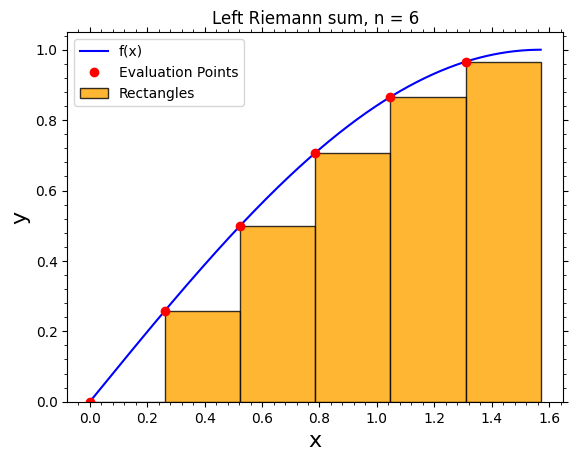

In [25]:
sin_func = np.sin
a = 0
b = np.pi/2.0
n = 6
answer_left = riemann_sum(sin_func, a, b, n, 'left', plot=True)

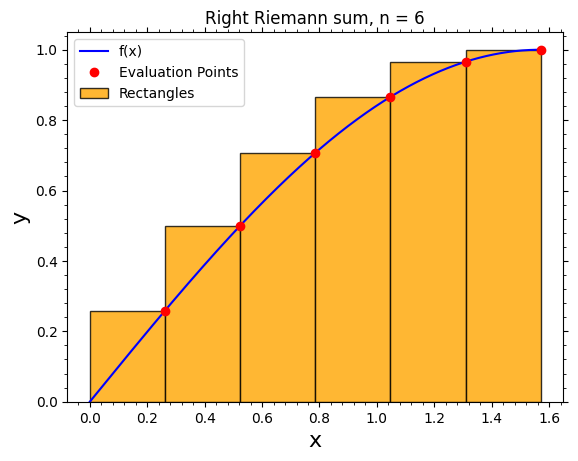

In [26]:
answer_right = riemann_sum(sin_func, a, b, n, 'right', plot=True)

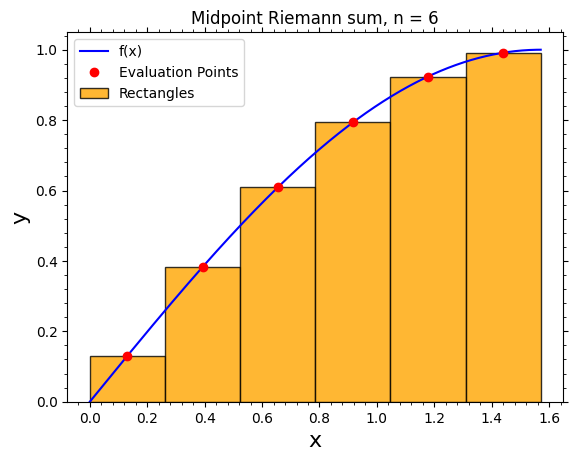

In [27]:
answer_midpoint = riemann_sum(sin_func, a, b, n, 'midpoint', plot=True)

## The Trapezoidal Rule

This integration technique simply replaces the vertical rectangular strip with a vertical trapezoid, with area given by the width $\Delta x$ times the average
of the left and right values of the function, i.e. the area of the $i$-th trapezoid is 
$$
\frac{\Delta x}{2}[f(x_i)+f(x_{i+1})]
$$ 
and so for a sequence of trapezoidal strips we get
$$
\begin{align*}
\int_a^bf(x)dx &= \frac{\Delta x}{2}\left\{[f(a)+f(a+\Delta x)]+[f(a+\Delta x)+f(a+2\Delta x)]+\ldots\right. \\
&\quad \left.+[f(b-2\Delta x)+f(b-\Delta x)]+[f(b-\Delta x)+f(b)]\right\} \\
&= \Delta x\left[\frac{1}{2}f(a)+f(a+\Delta x)+f(a+2\Delta x)+\ldots\right. \\
&\quad \left.+f(b-2\Delta x)+f(b-\Delta x)+\frac{1}{2}f(b)\right]. 
\end{align*}
$$
In other words, for equally spaced abscissas, the weights are simply $\Delta x$ except for the two endpoints, for which they are $\Delta x/2$.  Below is code to perform numerical integration via the trapezoidal rule

In [28]:
def trapezoidal_rule(func, a, b, n, plot=True):
    """
    Compute the integral of func(x) over the interval [a, b] using the trapezoidal rule.

    Parameters
    ----------
    func : callable 
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    n : int, optional
        The number of subintervals to use. 
    plot : bool, optional
        If True, plot the function func(x) over the interval [a, b] as well as the trapezoids 
        used to compute the trapezoidal rule. Default is True.

    Returns
    -------
    answer : float
        The estimate of the integral of func(x) over the interval [a, b].

    """

    # Create the partition of the interval [a, b]
    x = np.linspace(a, b, n+1)
    dx = (b - a) / n

    # Compute the value of the function at the partition points
    y = func(x)

    # Compute the area of each trapezoid, all the values appear twice in this average except the first and last
    area = (dx / 2) * (y[:-1] + y[1:])

    # Compute the integral using the trapezoidal rule
    answer = np.sum(area)

    # Plot the function and the trapezoids
    if plot:
        x_fine = np.linspace(a, b, 1000)
        plt.plot(x_fine, func(x_fine), 'black', label='f(x)')
        plt.plot(x, y, 'ro', label='Endpoints')
        plt.title('Trapezoidal Rule, n = {}'.format(n))
        plt.xlabel('x', fontsize=16)
        plt.ylabel('y', fontsize=16)
        for i in range(n):
            xs = [x[i], x[i], x[i+1], x[i+1]]
            ys =  [0, func(x[i]), func(x[i+1]), 0]
            plt.fill(xs, ys, 'orange', edgecolor='black', alpha=0.8)
        plt.gca().xaxis.set_minor_locator(AutoMinorLocator(5))
        plt.gca().yaxis.set_minor_locator(AutoMinorLocator(5))
        plt.gca().tick_params(which='both', top=True, right=True)
        plt.legend(loc='best')

    return answer

Trapezoidal Rule: 0.99428189


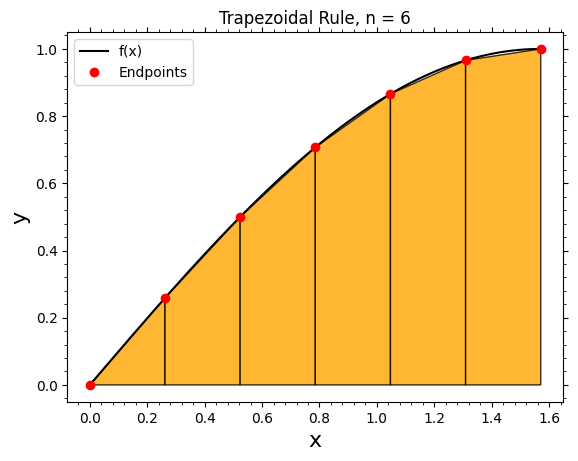

In [30]:
# Example for Trapezoidal Rule
answer_trapezoidal = trapezoidal_rule(sin_func, a, b, n, plot=True)
print(f"Trapezoidal Rule: {answer_trapezoidal:.8f}")


## Quantifying the Convergence of Numerical Integrals

What about the error in the numerical integration?  If $I$ is the numerical approximation to the integral, the absolute error is defined as: 
$$
\epsilon_{\rm abs} = \left| I - \int_a^b f(x)dx \right|
$$

The metric often used to compare different integration methods is their scaling with the number of function evaluations $n$.  The basic idea 
is that we want to maximize the bang (accuracy) for the computational buck (number of function evaluations), and if the error scales as $\epsilon_{\rm abs}\propto 1/n^p$, then we say that the method has a convergence rate of $p$. Larger values of $p$ are of course more desirable. If we now compare our results for the different methods implemented above we find that for the same number of $n=6$ strips:

In [31]:
truth = 1.0
print(f"Truth               : {truth:.8f}")
print(f"Left Riemann Sum    : {answer_left:.8f}, Error: {abs(answer_left - truth):.8f}")
print(f"Right Riemann Sum   : {answer_right:.8f}, Error: {abs(answer_right - truth):.8f}")
print(f"Midpoint Riemann Sum: {answer_midpoint:.8f}, Error: {abs(answer_midpoint - truth):.8f}")
print(f"Trapezoidal Rule    : {answer_trapezoidal:.8f}, Error: {abs(answer_trapezoidal - truth):.8f}")


Truth               : 1.00000000
Left Riemann Sum    : 0.86338219, Error: 0.13661781
Right Riemann Sum   : 1.12518158, Error: 0.12518158
Midpoint Riemann Sum: 1.00286151, Error: 0.00286151
Trapezoidal Rule    : 0.99428189, Error: 0.00571811


So apparently the Midpoint Riemann Sum is the current winner, but not by a tremendous amount compared to the Trapezoidal Rule. Let's try to understand this. 

For a left or right Riemann sum the area contribution from each strip will differ from the actual area under the
curve by approximately 
$$
\Delta x[f(x_{i+1})-f(x_i)]/2
$$, 
which is roughly the area of the orange (white) shaded *triangle* above (below) the curve in our plots above for the right (left) Riemann sums. For the $\sin(x)$ curve we chose, the left Riemann sum  systematically underestimates the integral, whereas the right Rimeann sum  systematically overestimates the integral, as we saw for the numerical values above.  Note that this error is 
$$
\simeq \Delta x^2 f^\prime(x_i)/2, 
$$
where we used that $f(x_{i+1})-f(x_i)\simeq \Delta x f^\prime(x_i)$. Since we are summing over $n=(b-a)/\Delta x$ strips, we expect the total integration error to be proportional to 
$$
\epsilon_{\rm abs} = n\times[{\rm error~per~strip}] = \frac{b-a}{\Delta x}[\Delta x^2 f^\prime(x_i)/2]  \propto \Delta x\propto 1/n. 
$$
This simple scaling argument elucidates the basic behavior, indeed it can be proven mathematically that an **upper bound** on the error for the left or right Riemann sum is
$$
\epsilon_{\rm abs} \le \frac{(b-a)^2}{2n}\max_{x\in[a,b]}|f^{\prime}(x)|, 
$$
where the $\max_{x\in[a,b]}|f^{\prime}(x)|$ means that the maximum of the absolute value of the derivative of the function is taken over the interval $[a,b]$.
Note that this is an upper bound, the actual error depends on the specific behavior of the function over the entire interval and it can be smaller than this bound. 

It is clear from our plot above that the midpoint rule should however be more accurate than the left or right Riemann sums, because using the value at the midpoint for the height means that while we overestimate the area on one side of the midpoint, we underestimate it on the other side, and so these tend to cancel each other out.  Indeed, it can be shown that because of this cancellation, the error in the midpoint rule per strip scales as $\Delta x^3$, and hence the total absolute error now scales as $\Delta x^2$ or $1/n^2$. 
Similar to above, it can be proven that an **upper bound** on the error in the midpoint Riemann sum is
$$
\epsilon_{\rm abs} \le \frac{(b-a)^3}{24n^2}\max_{x\in[a,b]}|f^{\prime\prime}(x)|
$$

Similarly, the improved approximation in the trapzeoidal rule results in a error per strip that now scales as $\Delta x^3$, giving an
overall error in the integral $\propto \Delta x^2\propto 1/n^2$. It can be proven that an **upper bound** on the error in the trapezoidal rule is
$$
\epsilon_{\rm abs} \le \frac{(b-a)^3}{12n^2}\max_{x\in[a,b]}|f^{\prime\prime}(x)|
$$
Notice that the **upper bound** on the error in the midpoint rule is smaller than the error in the trapezoidal rule by a factor of 2. This is a 
statement about the the upper bounds only, the actual errors can be smaller than this bound and furthermore one can find cases where the trapezoidal rule is more accurate than the midpoint rule.

Let's write some code to verify the scaling with $n$:


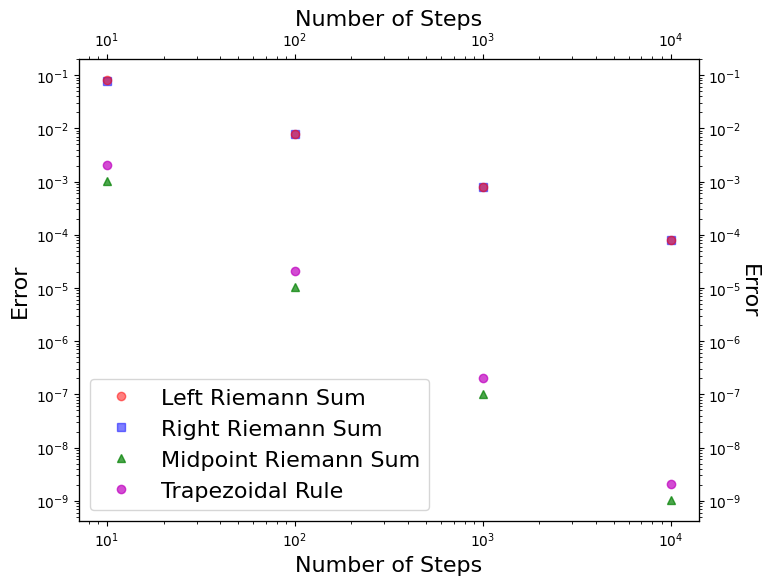

In [32]:
N_vals = [10, 100, 1000, 10000]
left_error = np.zeros(len(N_vals))
righ_error = np.zeros_like(left_error)
midp_error = np.zeros_like(left_error)
trap_error = np.zeros_like(left_error)
for ii, nn in enumerate(N_vals): 
    left_error[ii] = np.abs(riemann_sum(np.sin, a, b, nn, 'left', plot=False) - truth)
    righ_error[ii] = np.abs(riemann_sum(np.sin, a, b, nn, 'right', plot=False) - truth)
    midp_error[ii] = np.abs(riemann_sum(np.sin, a, b, nn, 'midpoint', plot=False) - truth)
    trap_error[ii] = np.abs(trapezoidal_rule(np.sin, a, b, nn, plot=False) - truth)

fig  = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(N_vals, left_error, 'ro', alpha=0.5, label='Left Riemann Sum')
ax.plot(N_vals, righ_error, 'bs', alpha=0.5, label='Right Riemann Sum', zorder=1)
ax.plot(N_vals, midp_error, 'g^', alpha=0.7, label='Midpoint Riemann Sum')
ax.plot(N_vals, trap_error, 'mo', alpha=0.7, label='Trapezoidal Rule')

# Let's use a log-log scale, since we are dealing with a large dynamic range in both x and y
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Error', fontsize=16)
ax.set_xlabel('Number of Steps', fontsize=16)
ax.legend(loc='best', fontsize=16)

# Some extra code here to add ticks, tick labels, and axes labels to the top x-axis right y-axis
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yscale('log')
ax_right.set_ylabel('Error', fontsize=16, rotation=270, labelpad=12)
ax_right.yaxis.set_label_position('right')
ax_right.yaxis.tick_right()

ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xscale('log')
ax_top.set_xlabel('Number of Steps', fontsize=16)
ax_top.xaxis.set_label_position('top')
ax_top.xaxis.tick_top()



## Simpson's Rule

Whereas for the trapezoidal rule we approximated our function $f(x)$ by a straight line between neighboring abscissas.  One can go to still **higher order** by approximating $f(x)$ by a parabola between neighboring triplets of abscissas. The result is Simpson's rule.  The area of two neighboring strips which define the parabola is then  given by $(\Delta x/3)[f(x_i)+4f(x_{i+1})+f(x_{i+2})]$.  Extending this over our 
entire integration interval gives, for an odd number of equally spaced
abscissas,
$$
\int_a^bf(x)dx = \Delta x\Biggl[\frac{1}{3}f(a)+\frac{4}{3}f(a+\Delta x)+\frac{2}{3}f(a+2\Delta x)+
\frac{4}{3}f(a+3\Delta x)+\ldots \\
+ \frac{2}{3}f(b-2\Delta x)+\frac{4}{3}f(b-\Delta x)+\frac{1}{3}
f(b)\Biggr],
$$

We won't go into more detail about Simpson's rule, but it performs even better and results in an overall integration error that scales as $\propto 1/n^4$.  Thus if we double the number of strips, we decrease the error by a factor of 16!  In terms of the upper bound on the error, it can be proven that
$$
\epsilon_{\rm abs} \le \frac{(b-a)^5}{180n^4}\max_{x\in[a,b]}|f^{\prime\prime\prime\prime}(x)|
$$

## Gaussian Quadrature

So far all the integration methods we have examined use equally spaced abscissas.  This is not necessary, as we could vary the widths of individual
strips in the trapezoidal rule or neighboring pairs of strips in Simpson's rule without changing anything fundamental.  But we could also do something
much more clever:  choose abscissa values beforehand to gain much greater accuracy for certain classes of function.  This is the idea behind Gaussian
quadratures,  where  **quadrature** refers to the process of numerically approximating the area under a curve. This is especially useful if you are defining a grid for a big numerical simulation, say, and you want to choose grid points that enable you to perform accurate integrals without needing zillions of points.
See the Wikipedia article on [Gaussian Quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature) if you would like to learn more about this method.

## Improper Integrals

An improper integral is one in which either or both of the following occur:
- Integration domain extends to infinity 
- the function $f(x)$ diverges within the integration domain.

The first case can be handled numerically by making a change of integration variable so that the domain becomes finite, and
as we discuss below, the Scipy routine `integrate.quad` even does this for you if you give it infinite bounds using `np.inf`.  

The second case is handled by using a so-called **open integration formula**, where the function
is not evaluated at the endpoint.  For example, suppose $f(x)$ blows up with an integrable singularity (like $1/\sqrt{x-a}$) at $x=a$.  Then we can make
the crude approximation (a right Riemann sum) that over the problematic interval
$$
\int_a^{a+\Delta x}f(x)dx\simeq \Delta x f(a+\Delta x),
$$
and the error in this evaluation will go to zero quadratically in $\Delta x$ as
$\Delta x\rightarrow0$ (i.e. just perform a Taylor expanation about $a$, which is what we did above when discussing the error on Riemann sums).   Our trapezoidal rule integration formula would then be modifed to 
$$
\int_a^bf(x)dx=\Delta x\left[\frac{3}{2}f(a+\Delta x)+f(a+2\Delta x)+...f(b-2\Delta x)+f(b-\Delta x)+\frac{1}{2}
f(b)\right].
$$
Higher order open formulas that converge faster with $\Delta x$ can also be used.


## Numerical Integration Using Scipy

The discussion above has illustrated some of the basic principles underlying numerical integration. Namely, one can approximate the area under a curve by summing over the function values at a set of abscissas, weighted by a set of weights.  Clever choices of absicissas and weights can result in error cancellations that lead to more accurate approximations. This results in a better scaling of the error with the number of function evaluations (strips in our examples) $n$, producing more bang for computational buck.  The actual error depends on the specific behavior of the function over the entire interval, which can be smaller than the theoretical upper bounds we presented above. 

In practice, we don't need to implement these methods ourselves, as they are already implemented in the `scipy` library in a module `integrate` that contains a function `quad` that can be used to perform numerical integration.  The `quad` function performs [**Clenched-Curtis quadrature**](https://en.wikipedia.org/wiki/Clenshaw–Curtis_quadrature) as the default, which is a general purpose quadrature technique  that is is more efficient and accurate than the methods we discussed above. 
 
For example: 

In [33]:
from scipy import integrate
answer_scipy, error = integrate.quad(np.sin, a, b)
print(f"Scipy Integration   : {answer_scipy:.16f}, Error: {error:.2e}")

Scipy Integration   : 0.9999999999999999, Error: 1.11e-14


Above the first value returned is the answer and the second is an estimate of the absolute error in the integral.  Running with the `full_output=True` option will return more information about the integration.  Specifically

In [35]:
answer_scipy, error, info = integrate.quad(np.sin, a, b, full_output=True)
print('Number of evaluations =', info['neval'])

Number of evaluations = 21




which means that we achieved an absolute error $\epsilon_{\rm abs}(n) \sim 10^{-14}$ with just 21 function evaluations, whereas for the midpoint rule:

In [ ]:
midpoint_21 = riemann_sum(np.sin, a, b, 21, 'midpoint', plot=False)
print(f"Midpoint Riemann Sum (n = 21)        = {midpoint_21:.6}")
print(f"Error (n = 21)                       = {np.abs(midpoint_21 - truth):.6}")


Note that `scipy.integrate.quad` can also perform improper integrals. For example if we want to integrate the Gaussian function 
$$
\int_{-\infty}^{\infty}e^{-x^2}dx = \sqrt{\pi}
$$ 
we can use the `np.inf` keyword to specify infinity:

In [ ]:
def gauss(x): 
    """
    Return the Gaussian function exp(-x^2)

    Parameters
    ----------
    x : float or array_like
        The value(s) at which to evaluate the Gaussian function.
    
    Returns
    -------
    float or array_like
        The value of the Gaussian function at x.
    """
    return np.exp(-np.square(x))

answer_gauss, error_gauss = integrate.quad(gauss, -np.inf, np.inf)
print(f"Numerical result : {answer_gauss:.16f}")
print(f"Exact result     : {np.sqrt(np.pi):.16f}")
print(f"Estimated error  : {error_gauss:.2e}")
print(f"Actual error     : {np.abs(answer_gauss - np.sqrt(np.pi)):.16}")


There are many other useful functions in `scipy.integrate`. For example double and triple integrals can be done with the routines `integrate.dblquad` and `integrate.tplquad`, respectively.  Gaussian quadrature can be performed with `integrate.fixed_quad`.  The trapezoidal rule and Simpson's rule have been implemented for functions that have already been evaluated in a `numpy` array over some set of abscissas (check out the documentation on `scipy.integrate.trapezoid` or `scipy.integrate.simpson`). This can be useful for example if you have a function that is only defined numerically on a grid. There is also a `numpy` function `numpy.trapezoid` that performs integration via the trapezoidal rule on a irregularly spaced set of abscissas and function values. 